In [1]:
import pandas as pd

In [2]:
base = pd.read_csv("modelagem_rh.csv")

In [3]:
base.shape

(14999, 10)

In [4]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
base.saiu.value_counts()

saiu
0    11428
1     3571
Name: count, dtype: int64

In [6]:
base.saiu.value_counts()/len(base)*100

saiu
0    76.191746
1    23.808254
Name: count, dtype: float64

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

<Axes: xlabel='saiu'>

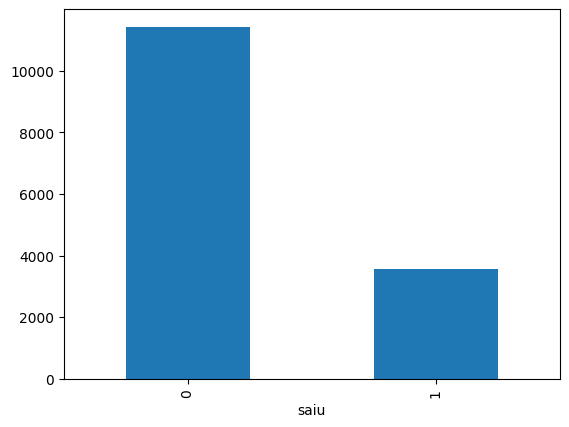

In [9]:
base.saiu.value_counts().plot(kind="bar")

([<matplotlib.axis.XTick at 0x254b0ce8b50>,
 [Text(0, 0, 'Não saiu'), Text(1, 0, 'Saiu')])

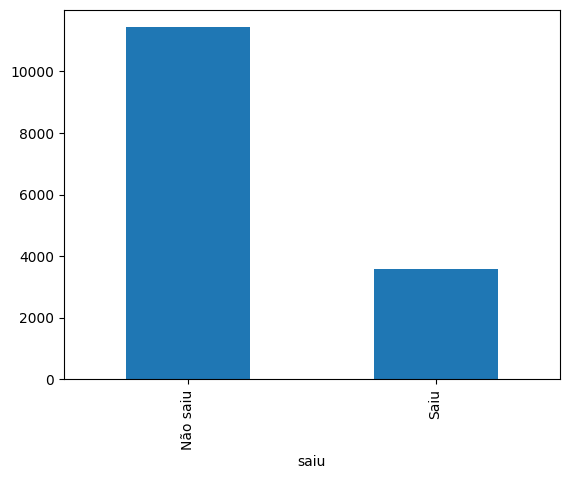

In [10]:
base.saiu.value_counts().plot(kind="bar")
plt.xticks((0,1), ["Não saiu", "Saiu"])

In [11]:
pd.crosstab(base.departamento, base.saiu)

saiu,0,1
departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [12]:
valores = pd.crosstab(base.departamento, base.saiu)

In [13]:
soma = valores.sum(axis=1)

In [14]:
soma

departamento
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [15]:
valores.divide(soma, axis=0)*100

saiu,0,1
departamento,,
IT,77.750611,22.249389
RandD,84.625159,15.374841
accounting,73.402868,26.597132
hr,70.906631,29.093369
management,85.555556,14.444444
marketing,76.340326,23.659674
product_mng,78.048780,21.951220
sales,75.507246,24.492754
support,75.100942,24.899058


In [16]:
pd.crosstab(base.salario, base.saiu)

saiu,0,1
salario,,
high,1155,82
low,5144,2172
medium,5129,1317


In [17]:
valores_salario = pd.crosstab(base.salario, base.saiu)
soma_salario = valores_salario.sum(axis=1)

In [18]:
valores_salario.divide(soma_salario, axis=0)*100

saiu,0,1
salario,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


In [19]:
porc_salario =  valores_salario.divide(soma_salario, axis=0)*100

<Axes: xlabel='salario'>

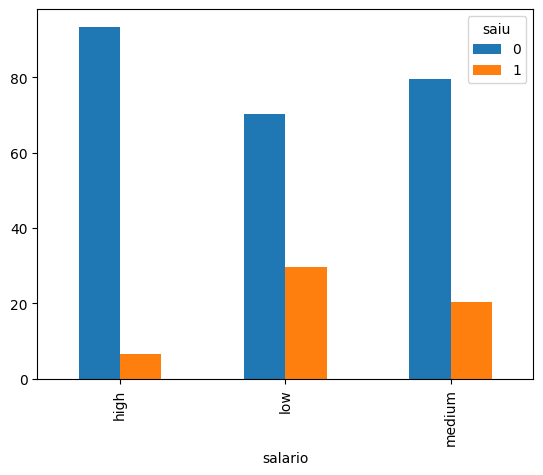

In [20]:
porc_salario.plot(kind="bar")

<Axes: xlabel='salario'>

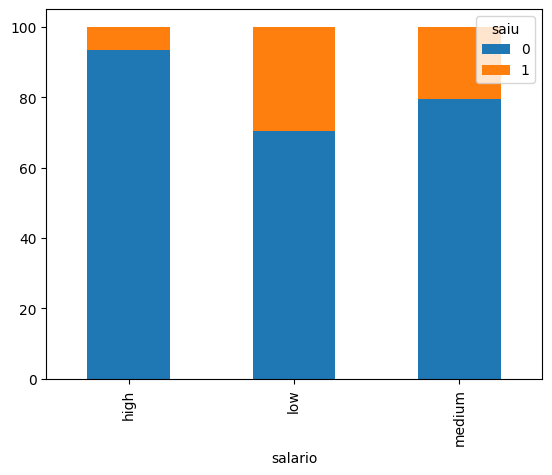

In [21]:
porc_salario.plot(kind="bar", stacked=True)

In [22]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [23]:
base.isnull().sum()

nivel_satisfacao      21
ult_avaliacao          0
num_projetos           0
media_horas_mes        0
tempo_empresa          0
aci_trabalho           0
saiu                   0
promocao_ult_5anos     0
departamento           0
salario                0
dtype: int64

In [24]:
base.nivel_satisfacao.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
14994    False
14995    False
14996    False
14997    False
14998    False
Name: nivel_satisfacao, Length: 14999, dtype: bool

In [25]:
base.loc[base.nivel_satisfacao.isnull(),'nivel_satisfacao'] = \
base.nivel_satisfacao.mean()

In [26]:
base.isnull().sum()

nivel_satisfacao      0
ult_avaliacao         0
num_projetos          0
media_horas_mes       0
tempo_empresa         0
aci_trabalho          0
saiu                  0
promocao_ult_5anos    0
departamento          0
salario               0
dtype: int64

In [27]:
base = pd.get_dummies(base, drop_first=True)

In [28]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [29]:
base.max()

nivel_satisfacao             1.0
ult_avaliacao                1.0
num_projetos                   7
media_horas_mes              310
tempo_empresa                 10
aci_trabalho                   1
saiu                           1
promocao_ult_5anos             1
departamento_RandD          True
departamento_accounting     True
departamento_hr             True
departamento_management     True
departamento_marketing      True
departamento_product_mng    True
departamento_sales          True
departamento_support        True
departamento_technical      True
salario_low                 True
salario_medium              True
dtype: object

In [30]:
pd.DataFrame([base.max(), base.min()], index=["max", "min"])

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
max,1.00,1.00,7,310,10,1,1,1,True,True,True,True,True,True,True,True,True,True,True
min,0.09,0.36,2,96,2,0,0,0,False,False,False,False,False,False,False,False,False,False,False


In [31]:
pd.DataFrame([base.max(), base.min()], index=["max", "min"]).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7,2
media_horas_mes,310,96
tempo_empresa,10,2
aci_trabalho,1,0
saiu,1,0
promocao_ult_5anos,1,0
departamento_RandD,True,False
departamento_accounting,True,False


In [32]:
from sklearn import preprocessing

In [33]:
x = base.values

In [34]:
x

array([[0.38, 0.53, 2, ..., False, True, False],
       [0.8, 0.86, 5, ..., False, False, True],
       [0.11, 0.88, 7, ..., False, False, True],
       ...,
       [0.37, 0.53, 2, ..., False, True, False],
       [0.11, 0.96, 6, ..., False, True, False],
       [0.37, 0.52, 2, ..., False, True, False]], dtype=object)

In [35]:
minmax = preprocessing.MinMaxScaler()

In [36]:
x_scaled = minmax.fit_transform(x)

In [37]:
x_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [38]:
base = pd.DataFrame(x_scaled, columns=base.columns)

In [39]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
pd.DataFrame([base.max(), base.min()], index=["max", "min"]).T

,max,min
nivel_satisfacao,1.0,0.0
ult_avaliacao,1.0,0.0
num_projetos,1.0,0.0
media_horas_mes,1.0,0.0
tempo_empresa,1.0,0.0
aci_trabalho,1.0,0.0
saiu,1.0,0.0
promocao_ult_5anos,1.0,0.0
departamento_RandD,1.0,0.0
departamento_accounting,1.0,0.0
